In [1]:
# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.impute import KNNImputer
# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
data = pd.read_csv("../data/card_transactions.csv")

In [3]:
cust_id = data["customer_id"]

In [4]:
data.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [6]:
for col in data.columns:
    print(col)
    print(data[col].isna().sum())

customer_id
0
balance_account
0
purchases_amount
0
paid_advance
0
full_purchases
0
balance_frequency_update
0
installments
0
purchases_frequency
0
full_purchases_frequency
0
purchases_installments_frequency
0
cash_advance_frequency
0
nr_cash_advances
0
nr_purchases
0
credit_limit
1
fixed_rate_period
0
payments
0
min_payments
298
full_payment_prc
0


In [7]:
data = data.drop(columns=["customer_id"])

In [8]:
# let's try to impute the data with KNN imputer
imputer = KNNImputer(n_neighbors=2)
data_clean = imputer.fit_transform(data)

data_clean = pd.DataFrame(data_clean, columns=data.columns)

In [9]:
data_clean

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0.0,10.0,1000.0,11.0,89.868853,89.711672,0.428571
1,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,6.0,54.722514,82.955180,0.000000
2,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6.0,0.0,1500.0,11.0,303.031979,443.781316,0.000000
3,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0.0,13.0,2000.0,12.0,704.240770,795.859808,0.000000
4,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3.0,1.0,2500.0,12.0,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1.0,0.0,8500.0,12.0,662.387331,260.277533,0.000000
8496,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0.0,11.0,1500.0,12.0,141.974905,150.500248,0.166667
8497,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1.0,0.0,500.0,9.0,2437.932505,87.888575,0.000000
8498,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2.0,51.0,3000.0,12.0,462.848132,497.408854,0.000000


In [10]:
for col in data_clean.columns:
    print(col)
    print(data_clean[col].isna().sum())

balance_account
0
purchases_amount
0
paid_advance
0
full_purchases
0
balance_frequency_update
0
installments
0
purchases_frequency
0
full_purchases_frequency
0
purchases_installments_frequency
0
cash_advance_frequency
0
nr_cash_advances
0
nr_purchases
0
credit_limit
0
fixed_rate_period
0
payments
0
min_payments
0
full_payment_prc
0


In [11]:
data_clean.drop_duplicates()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0.0,10.0,1000.0,11.0,89.868853,89.711672,0.428571
1,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,6.0,54.722514,82.955180,0.000000
2,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6.0,0.0,1500.0,11.0,303.031979,443.781316,0.000000
3,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0.0,13.0,2000.0,12.0,704.240770,795.859808,0.000000
4,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3.0,1.0,2500.0,12.0,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1.0,0.0,8500.0,12.0,662.387331,260.277533,0.000000
8496,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0.0,11.0,1500.0,12.0,141.974905,150.500248,0.166667
8497,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1.0,0.0,500.0,9.0,2437.932505,87.888575,0.000000
8498,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2.0,51.0,3000.0,12.0,462.848132,497.408854,0.000000


In [12]:
# SEEMS NO DUPLICATES

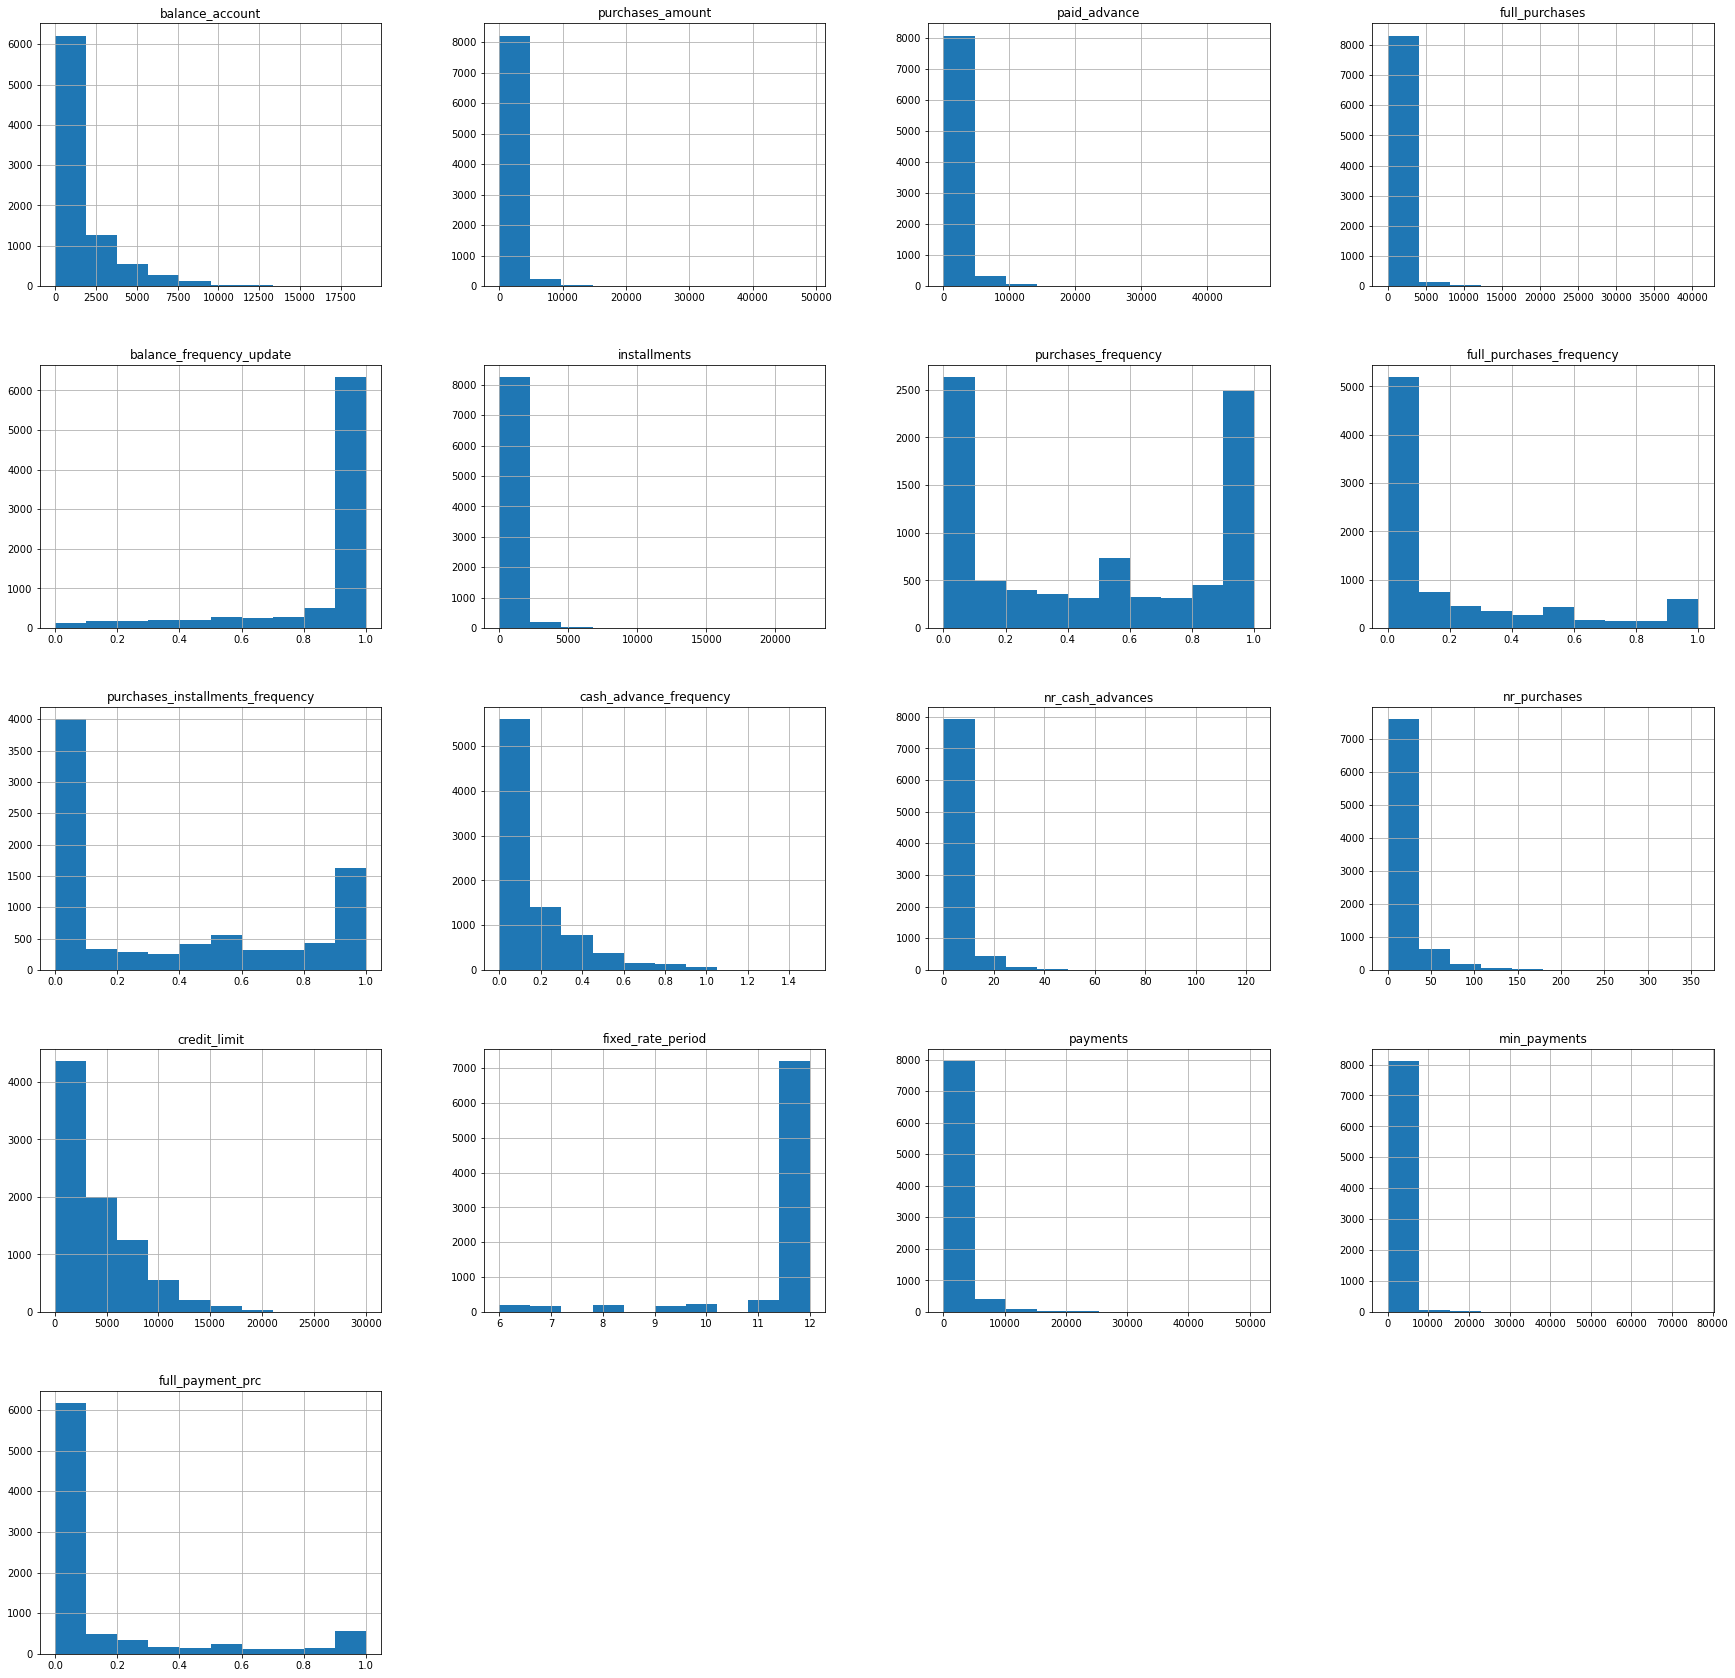

In [13]:
data.hist(figsize=(30,30))
plt.show();

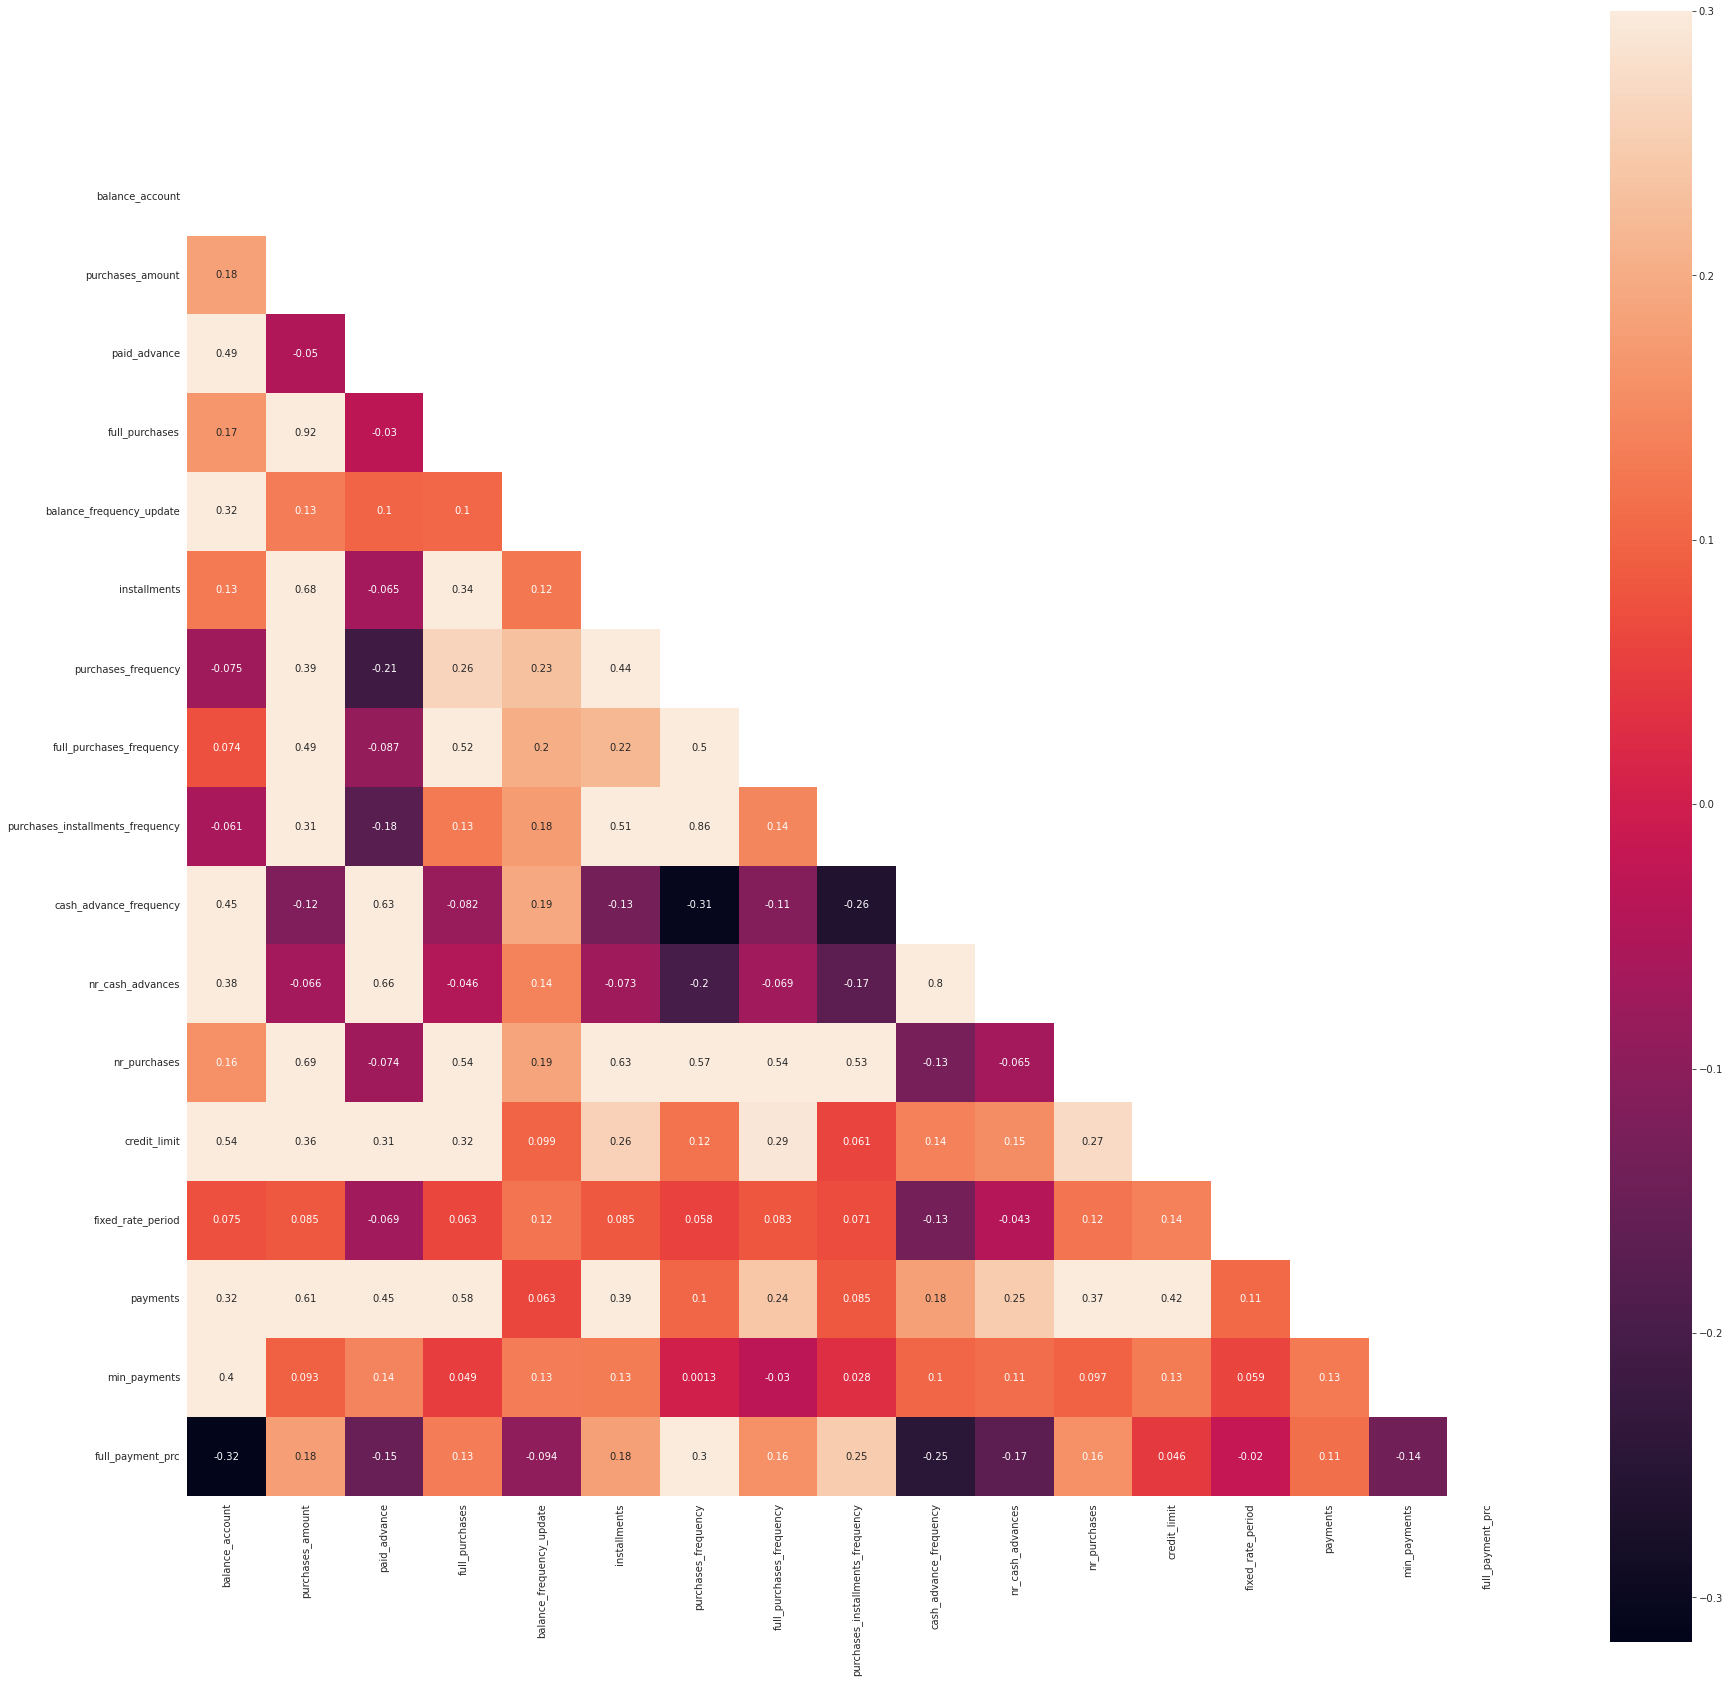

In [14]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 30))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

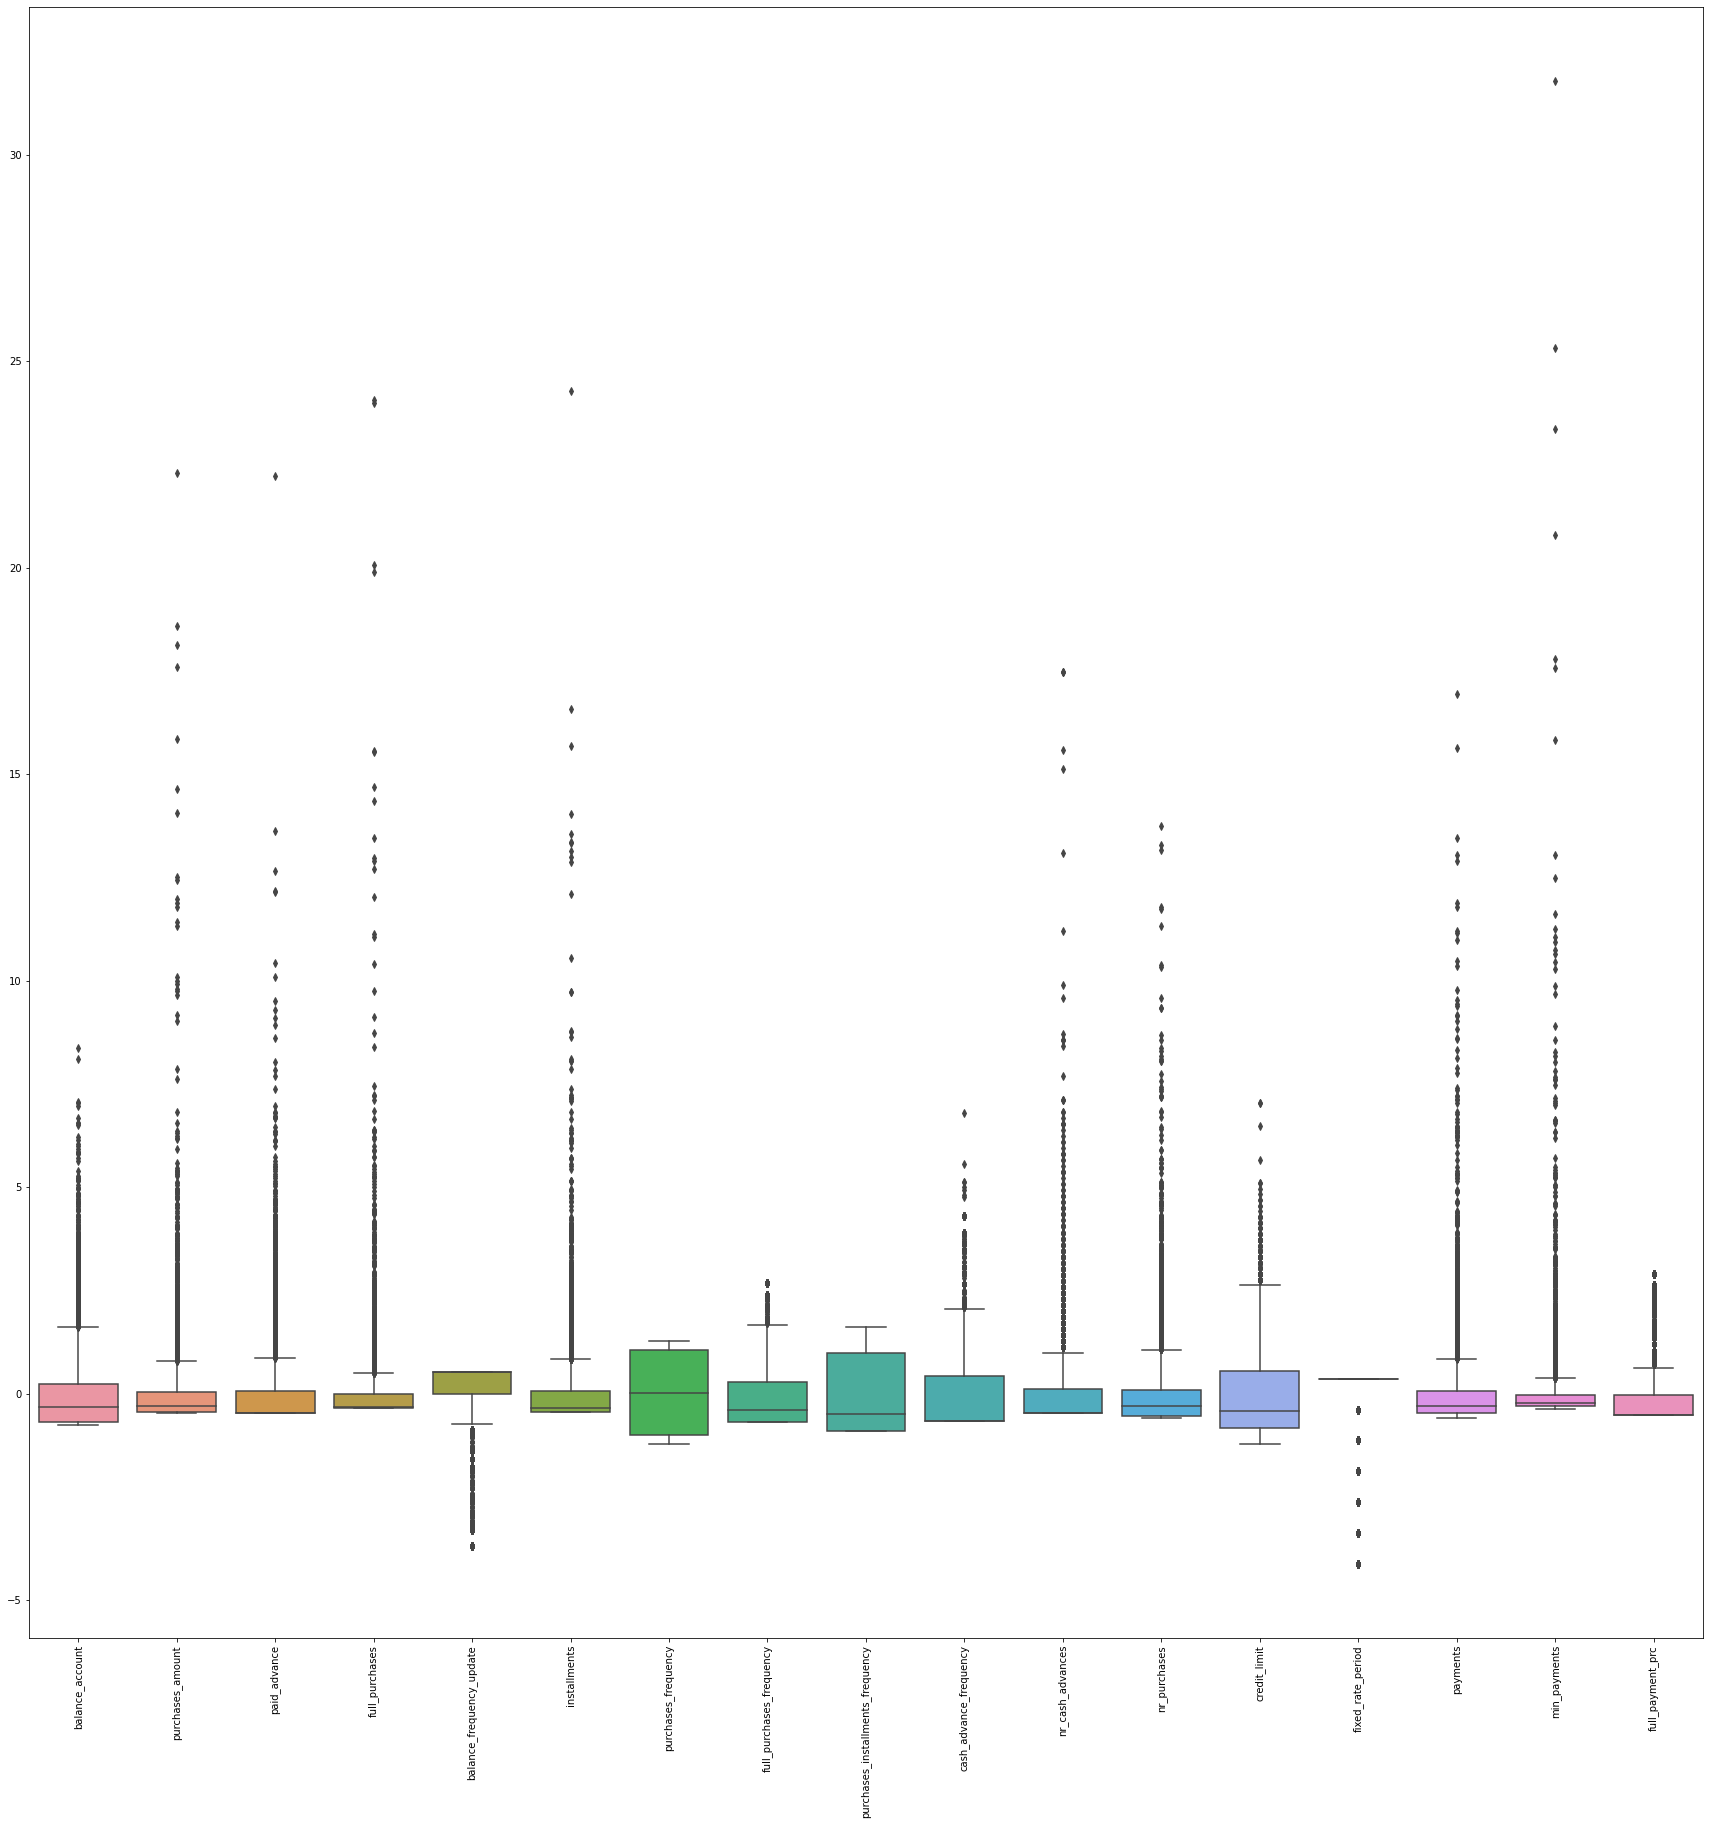

In [15]:
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
data_scaled = pd.DataFrame(scaler.fit_transform(data_clean), columns=data_clean.columns)
plt.figure(figsize=(30,30))
ax = sns.boxplot(data=data_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

array([[<AxesSubplot:title={'center':'balance_account'}>,
        <AxesSubplot:title={'center':'purchases_amount'}>,
        <AxesSubplot:title={'center':'paid_advance'}>,
        <AxesSubplot:title={'center':'full_purchases'}>],
       [<AxesSubplot:title={'center':'balance_frequency_update'}>,
        <AxesSubplot:title={'center':'installments'}>,
        <AxesSubplot:title={'center':'purchases_frequency'}>,
        <AxesSubplot:title={'center':'full_purchases_frequency'}>],
       [<AxesSubplot:title={'center':'purchases_installments_frequency'}>,
        <AxesSubplot:title={'center':'cash_advance_frequency'}>,
        <AxesSubplot:title={'center':'nr_cash_advances'}>,
        <AxesSubplot:title={'center':'nr_purchases'}>],
       [<AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'fixed_rate_period'}>,
        <AxesSubplot:title={'center':'payments'}>,
        <AxesSubplot:title={'center':'min_payments'}>],
       [<AxesSubplot:title={'center':'ful

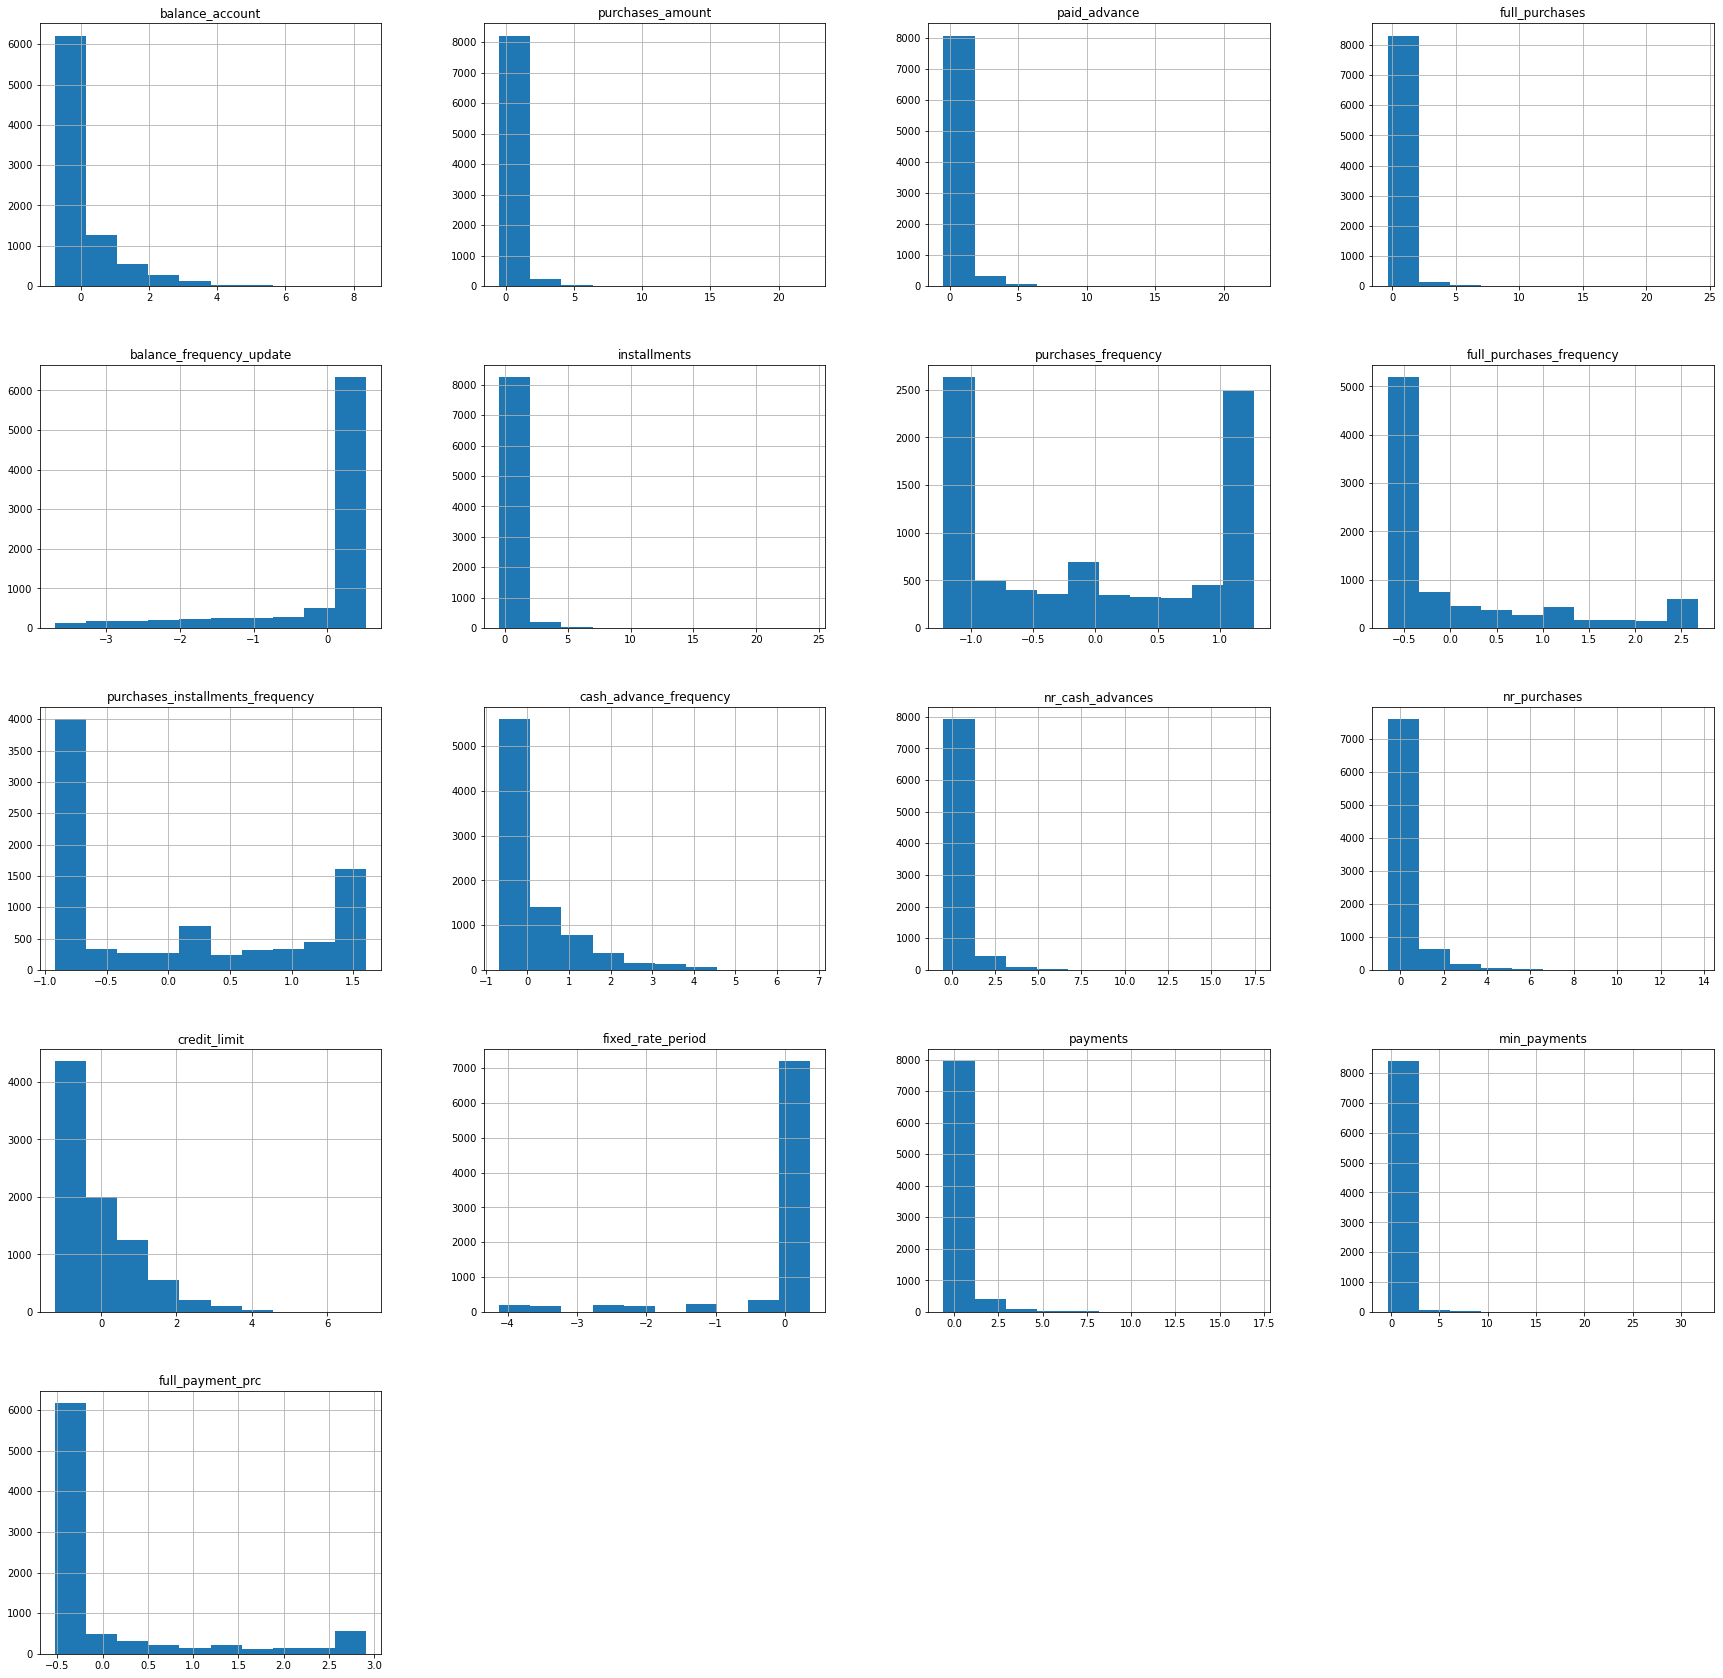

In [16]:
data_scaled.hist(figsize=(30,30))

In [17]:
data_clean.describe()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,1565.941403,999.561312,973.508540,588.165365,0.876272,411.708492,0.489383,0.201940,0.363796,0.135288,3.253647,14.677059,4485.656251,11.516118,1721.250989,857.343135,0.152587
std,2090.513302,2154.189460,2078.539061,1669.466184,0.237517,910.142440,0.401075,0.297756,0.397162,0.200892,6.854883,25.001561,3629.633860,1.339121,2893.200899,2377.646974,0.291505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,6.000000,0.000000,0.019163,0.000000
25%,126.318369,39.000000,0.000000,0.000000,0.875000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,12.000000,381.893717,165.879354,0.000000
50%,869.046468,360.000000,0.000000,37.400000,1.000000,89.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,12.000000,851.146952,298.933725,0.000000
75%,2053.674410,1105.897500,1113.726110,570.410000,1.000000,466.725000,0.916667,0.285714,0.750000,0.222222,4.000000,17.000000,6500.000000,12.000000,1897.014052,804.724525,0.142857
max,19043.138560,49039.570000,47137.211760,40761.250000,1.000000,22500.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,12.000000,50721.483360,76406.207520,1.000000


In [21]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [50]:
# basic DBSCAN
X = data_scaled.values
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 12
Estimated number of noise points: 7992
Silhouette Coefficient: -0.399


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

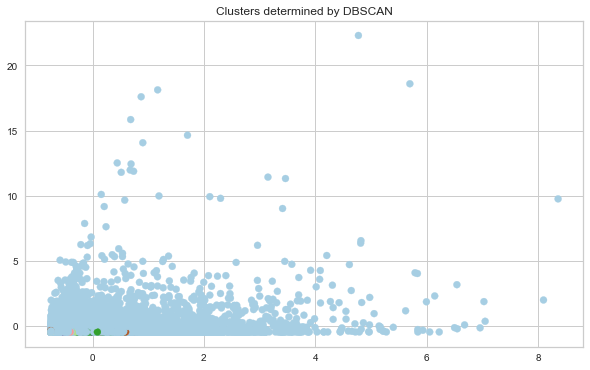

In [51]:
y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

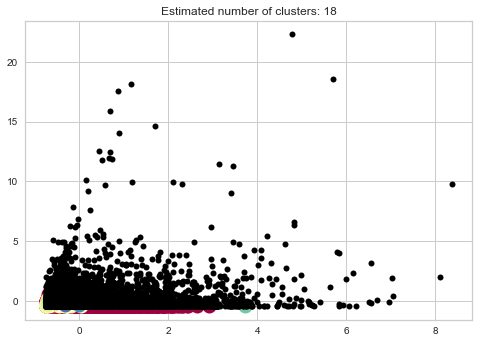

In [41]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

In [31]:
model = DBSCAN(eps=0.5, min_samples=10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

AttributeError: 'DBSCAN' object has no attribute 'n_clusters'

AttributeError: 'Pipeline' object has no attribute 'labels_'

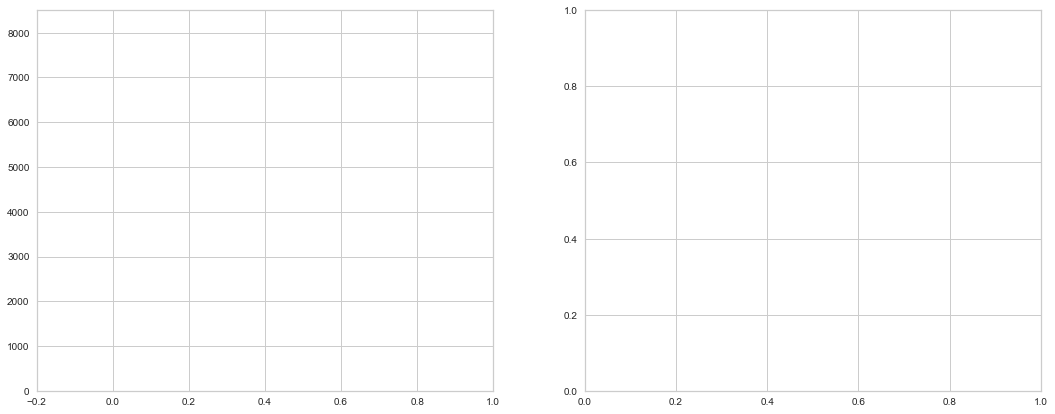

In [44]:
range_eps = np.arange(0.1,1.2,0.1)
#X = data_clean.copy()
#X = X.values.astype("float32")
cols = data_clean.columns

for epsilon in range_eps:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (epsilon) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    dbscan_pipeline = Pipeline(
        [
            (
                "cluster",
                DBSCAN(eps=epsilon,min_samples=5),
            ),
        ]
    )
    dbscan_res = dbscan_pipeline.fit(X)
    cluster_labels = dbscan_res.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print("Silhouette Coefficient: %0.3f" % silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
"""
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k",
    )

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()
"""